# 通过梯度下降训练Logistic Regression模型

现在，我们的问题是如何解得最佳w，其能最小化Log loss：![cost_function](cost_function_T.png)

通过梯度下降求解。

## Gradient descent 又称steepest descent：通过一阶迭代优化的方式，最小化目标函数，的过程。
    
    w := w - ƞ∇w
![iteration](gradient_descent.png)

w经过足够的迭代更新后，学得的w,b可用于分类新样本x':
![for_new_sample](classification.png)

默认决策阈值是0.5，也可以是其他值。

**假阴**务必避免的情况：预警，预测火灾发生（positive)，阈值可以<0.5，如0.3

**假阳**务必避免的情况：品控，预测产品良品率，阈值可以>0.5，如0.7

# 从零实现Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(input):
    return 1.0/(1 + np.exp(-input))

### 基于当前的w计算y_hat：

In [3]:
def compute_prediction(X, weights):
    """Compute the prediction y_hat based on current weights
    Args:
        X (numpy.ndarray)
        weights (numpy.ndarray)
    Return:
        numpy.ndarray, y_hat of X under weights
    """
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions

### w的更新函数：
![](gradient_descent.png)

In [5]:
def update_weights_gd(X_train, y_train, weights, learning_rate):
    """Update weights by one step
    Arg：
        X_train, y_train (np.ndarray, training data set)
        weights (np.ndarray)
        learning_rate (float)
    Return:
        numpy.ndarray, updated weights
    """
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train-predictions)
    m = y_train.shape[0]
    weights += learning_rate / float(m) *weights_delta
    return weights

### 计算代价函数：
![cost_function](cost_function_T.png)

In [4]:
def compute_cost(X, y, weights):
    """Compute the cost J(w)
    Args:
        X, y (numpy.ndarray, data set)
        weights (numpy.ndarray)
    Returns:
        float
    """
    predictions = compute_prediction(X, weights)
    cost = np.mean(-y * np.log(predictions) - (1-y)*np.log(1-predictions))
    return cost

### 联合以上得到模型训练函数：
    每次迭代更新w；
    每1000次迭代，print当前cost，确保cost确实在下降

In [16]:
def train_logistic_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    """Train a logistic regression model
    Args:
        X_train, y_train (numpy.nparray, training data set)
        max_iter (int, number of iterations)
        learning_rate (float)
        fit_intercept (bool, with an intercept w0 or not)
    Return:
        numpy.ndarray, learned weights
    """
    if fit_intercept: # 如果有w0，加一列
        intercept = np.ones((X_train.shape[0], 1)) 
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train,y_train,weights,learning_rate)
        if iteration % 1000 == 0:
            print(compute_cost(X_train,y_train,weights))
    return weights

### 最好，用训练好的模型预测新样本：

In [5]:
def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1: # 新样本的特征数应与w数一致
        intercept = np.ones((X.shape[0],1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)

## 测试

In [9]:
X_train = np.array([[6, 7],
                    [2, 4],
                    [3, 6],
                    [4, 7],
                    [1, 6],
                    [5, 2],
                    [2, 0],
                    [6, 3],
                    [4, 1],
                    [7, 2]])

y_train = np.array([0,
                    0,
                    0,
                    0,
                    0,
                    1,
                    1,
                    1,
                    1,
                    1])

In [10]:
weights = train_logistic_regression(X_train, y_train, max_iter=1000,
                                    learning_rate=0.1,fit_intercept=True)

0.574404237166
0.0344602233925
0.0182655727085
0.012493458388
0.00951532913855
0.00769338806065
0.00646209433351
0.00557351184683
0.00490163225453
0.00437556774067


In [12]:
X_test = np.array([[6, 1],
                   [1, 3],
                   [3, 1],
                   [4, 5]])

In [13]:
predictions = predict(X_test, weights)

In [14]:
predictions

array([ 0.9999478 ,  0.00743991,  0.9808652 ,  0.02080847])

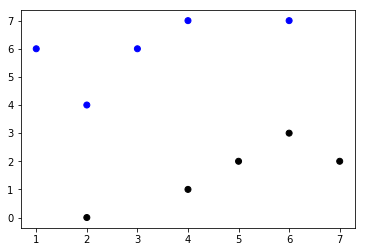

In [15]:
plt.scatter(X_train[:,0], X_train[:, 1], c=['b']*5+['k']*5, marker='o')

### 若阈值为0.5：

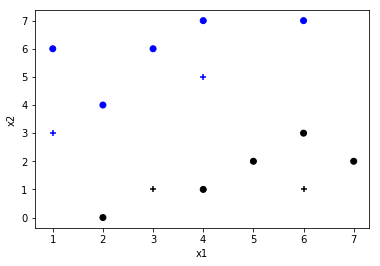

In [29]:
plt.scatter(X_train[:,0], X_train[:, 1], c=['b']*5+['k']*5, marker='o')
colors = ['k' if prediction >= 0.5 else 'b' for prediction in predictions]
plt.scatter(X_test[:,0], X_test[:,1],marker='+', c = colors)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# 梯度下降训练LR模型 及CTR预测

In [6]:
import csv

def read_ad_click_data(n, offset=0):
    X_dict, y = [], []
    with open('../../../Test/CTR/train.csv', 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for i in range(offset):
            next(reader)
        i = 0
        for row in reader:
            i += 1
            y.append(int(row['click']))
            del row['click'], row['id'], row['hour'], row['device_id'],row['device_ip']
            X_dict.append(row)
            if i >=n:
                break
    return X_dict, y

In [7]:
n = 10000
X_dict_train, y_train=read_ad_click_data(n)

In [8]:
from sklearn.feature_extraction import DictVectorizer
dict_one_hot_encoder = DictVectorizer(sparse=False)
X_train = dict_one_hot_encoder.fit_transform(X_dict_train)

X_dict_test,y_test = read_ad_click_data(n,n)
X_test = dict_one_hot_encoder.transform(X_dict_test)

X_train_10k = X_train
y_train_10k = np.array(y_train)

In [12]:
import timeit

In [17]:

start_time = timeit.default_timer()
weights = train_logistic_regression(X_train_10k, y_train_10k,max_iter=10000,learning_rate=0.01, fit_intercept=True)
print('--- %0.3fs seconds ---' % (timeit.default_timer() - start_time))

0.682001945674
0.43170915857
0.425685277505
0.422843135343
0.420960348782
0.419499856125
0.418277700999
0.417213474173
0.416265039542
0.415407033145
--- 261.713s seconds ---


## 测试

In [17]:
X_test_10k = X_test
predictions = predict(X_test_10k, weights)

In [18]:
from sklearn.metrics import roc_auc_score
print('The ROC AUC on testing set is: {0:.3f}'.format(roc_auc_score(y_test, predictions)))

The ROC AUC on testing set is: 0.711


结果比得上之前用随机森林的。

若数据量从10k变为100k，那么用梯度下降训练的LR模型耗费的时间会增加10倍，需要1小时以上。对于大规模数据，如百万级的，怎么处理更快？

# 以随机梯地下降SGD训练LR模型
基于梯度下降的LR模型，w的每轮迭代更新，都要遍历一遍全部训练样本，因此如果样本数非常大，整个训练过程就非常耗时间。

幸运的是，一个小调整就能使LR适应大数据。对于每次w的更新，只涉及一个训练样本，而不是整个训练集。模型每步移动，基于**单个训练样本的计算误差**。全部样本用完，一轮迭代就结束。这是梯度下降的进阶版，随机梯度下降SGD。

公式上，每轮迭代：![SGD](SGD.png)

SGD通常几轮迭代就能收敛（常常少于10轮），大数据集的处理上，比GD快很多。

### SGD的实现：

In [9]:
def update_weights_sgd(X_train, y_train, weights, learning_rate):
    """ One weight update iteration: moving weights by one step based on each individual sample
    Args:
        X_train, y_train (numpy.ndarray, training data set)
        weights (numpy.ndarray)
        learning_rate (float)
    Returns:
        numpy.ndarray, updated weights
    """
    for X_each, y_each in zip(X_train, y_train):
        prediction = compute_prediction(X_each, weights)
        weights_delta = X_each.T * (y_each - prediction)
        weights += learning_rate * weights_delta
    return weights

原train_logistic_regression 更改一行：

In [15]:
def train_logistic_regression_SGD(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    """Train a logistic regression model
    Args:
        X_train, y_train (numpy.ndarray, training data set)
        max_iter (int, number of iterations)
        learning_rate (float)
        fit_intercept (bool, with an intercept w0 or not)
    Return:
        numpy.ndarray, learned weights
    """
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_sgd(X_train, y_train, weights, learning_rate) # 只是这里换成SGD
        if iteration % 2 == 0 : # 每2轮确认下cost
            print(compute_cost(X_train, y_train, weights))
    return weights

#### 测试，10k训练样本

In [19]:
start_time = timeit.default_timer()
weights = train_logistic_regression_SGD(X_train_10k, y_train_10k, max_iter=5, learning_rate=0.01, fit_intercept=True)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))

from sklearn.metrics import roc_auc_score
predictions = predict(X_test_10k, weights)
print('The ROC AUC on testing set is: {0:.3f}'.format(roc_auc_score(y_test, predictions)))

0.414965479133
0.406007112829
0.401049374518
--- 1.872s seconds ---
The ROC AUC on testing set is: 0.720


完成训练只需1秒，而去表现比前面的模型更好

#### 测试100k:

In [21]:
n = 100000
X_dict_train, y_train = read_ad_click_data(n)
dict_one_hot_encoder = DictVectorizer(sparse=False)
X_train = dict_one_hot_encoder.fit_transform(X_dict_train)

X_train_100k = X_train
y_train_100k = np.array(y_train)

In [22]:
start_time = timeit.default_timer()
weights = train_logistic_regression_SGD(X_train_100k, y_train_100k, max_iter=5,
                                    learning_rate=0.01,fit_intercept=True)
print('--- %0.3fs seconds---' % (timeit.default_timer() - start_time))

0.412786485963
0.407850459722
0.405457331149
--- 67.391s seconds---


测试，下一个10k样本作测试集：

In [23]:
X_dict_test,y_test_next10k = read_ad_click_data(10000,100000)
X_test_next10k = dict_one_hot_encoder.transform(X_dict_test)
predictions = predict(X_test_next10k,weights)
print('The ROC AUC on testing set is: {0:.3f}'.format(roc_auc_score(y_test_next10k,
                                                                    predictions)))

The ROC AUC on testing set is: 0.736


# 用Sklearn

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_lr = SGDClassifier(loss='log',penalty=None,
                       fit_intercept=True,
                       n_iter=5,
                       learning_rate='constant', # 学习率在进程中不变，默认为‘optimal',即会逐渐减小
                       eta0=0.01)  # 学习率为0.01

In [25]:
sgd_lr.fit(X_train_100k,y_train_100k)
predictions = sgd_lr.predict_proba(X_test_next10k)[:,1]
print("The ROC AUC on testing set is: {0:.3f}".format(roc_auc_score(y_test_next10k,predictions)))

The ROC AUC on testing set is: 0.737
